<h1 style="color: rebeccapurple;">Unsupervised Learning - Dimensionality Reduction</h1>

<span style="text-transform: uppercase;
        font-size: 14px;
        letter-spacing: 1px;
        font-family: 'Segoe UI', sans-serif;">
    Author
</span><br>
efrén cruz cortés
<hr style="border: none; height: 1px; background: linear-gradient(to right, transparent 0%, #ccc 10%, transparent 100%); margin-top: 10px;">

## <span style="color:darkorange">Conceptual Intermezzo - Dimensionality Reduction</span>

(See slides)

Dimensionality reduction is another unsupervised method that is not the same as clustering, but is often used in conjunction with it, if anything to visualize and interpret the clustering results.

We won't go into details. The intuition is that it maps your original data, which lives in high dimensions, to lower dimensions, while trying to preserve the original structure.

Three common dimensionality reduction methods are PCA (principal component analysis) t-SNE, and UMAP (the latter not being available in sklearn, but there's a popular python library for it).

## <span style="color:darkorchid">Imports</span>

In [1]:
# Scikit-learn specifics:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import datasets

# Helper modules
import pandas as pd
import matplotlib.pyplot as plt

## <span style="color:darkorchid">Dimensionality Reduction

First let's load our cancer data:

In [2]:
data_dir = 'https://raw.githubusercontent.com/nuitrcs/scikit-learn-workshop/main/data/breast_cancer_wisconsin_clustering.csv'
cancer_data_df = pd.read_csv(data_dir)
# Scale
cancer_data_scaled = StandardScaler().fit_transform(cancer_data_df)

Let's remember its dimensionality:

In [3]:
cancer_data_scaled.shape

(569, 10)

Our data is 10-dimensional, hence, we can't really visualize it *as is*. In the clustering section we tried gaining some intuition by plotting all pairwise relationships, but some high-dimensional structure may still be lost that way.

## <span style="color:darkorchid">t-SNE

Using t-SNE is very straightforward:

In [4]:
t_embedder = TSNE(
    n_components=2,     # Map our data to 2 dimensions
    random_state=42     # Random seed for reproducibility
)
t_embedder

TSNE(random_state=42)

In [5]:
t_embedder.fit(cancer_data_scaled)

TSNE(random_state=42)

In [6]:
cancer_data_2d = t_embedder.embedding_

Let's take a look at our low dimensional embedding:

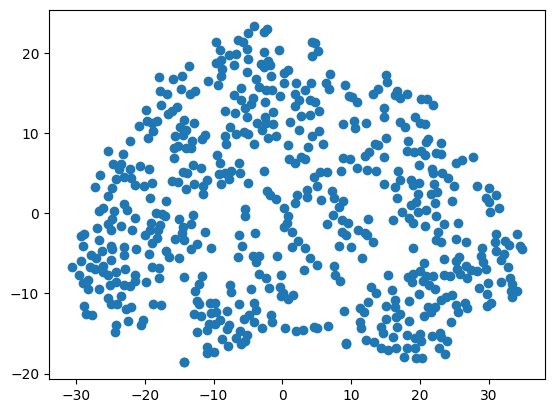

In [7]:
plt.scatter(cancer_data_2d[:,0], cancer_data_2d[:,1])
plt.show()

**NOTES**

* t-SNE's axes are not interpretable. t-SNE just looks for the best representation that keeps points which are close in the original high-d space also close in the low-d space.
* When looking at a low-d representation, focus on which set of points are presented as being close.
* For this reason, t-SNE (and other dimensionality reduction techniques) is often used in conjunction with clustering.

### <span style="color:teal">Metric

As mentioned, t-SNE tries to respect the high-dimensional distance in the sense that close points in high-d should remain close in low-d.

But, what do we mean by "close". We often encounter "flat" spaces where the Euclidean distance provides a natural way to determine closeness. However, in some instances other distances are better suited. For example, if you are dealing with text embeddings, the cosine similarity could be a better choice.

We won't go into this today, but I want you to be aware of it because it is important.

### <span style="color:teal">Hyperparameters

The t-SNE algorithm takes a couple of hyperparameters, the most important being the *perplexity*. The perplexity helps you determine how many neighbors should try to be respected as close, and in many cases is crucial for cluster discovery.

Let's try a few values for perplexity, and see how the embeddings change. The default sklearn value is $30$, and perplexity cannot be larger than the sample size.

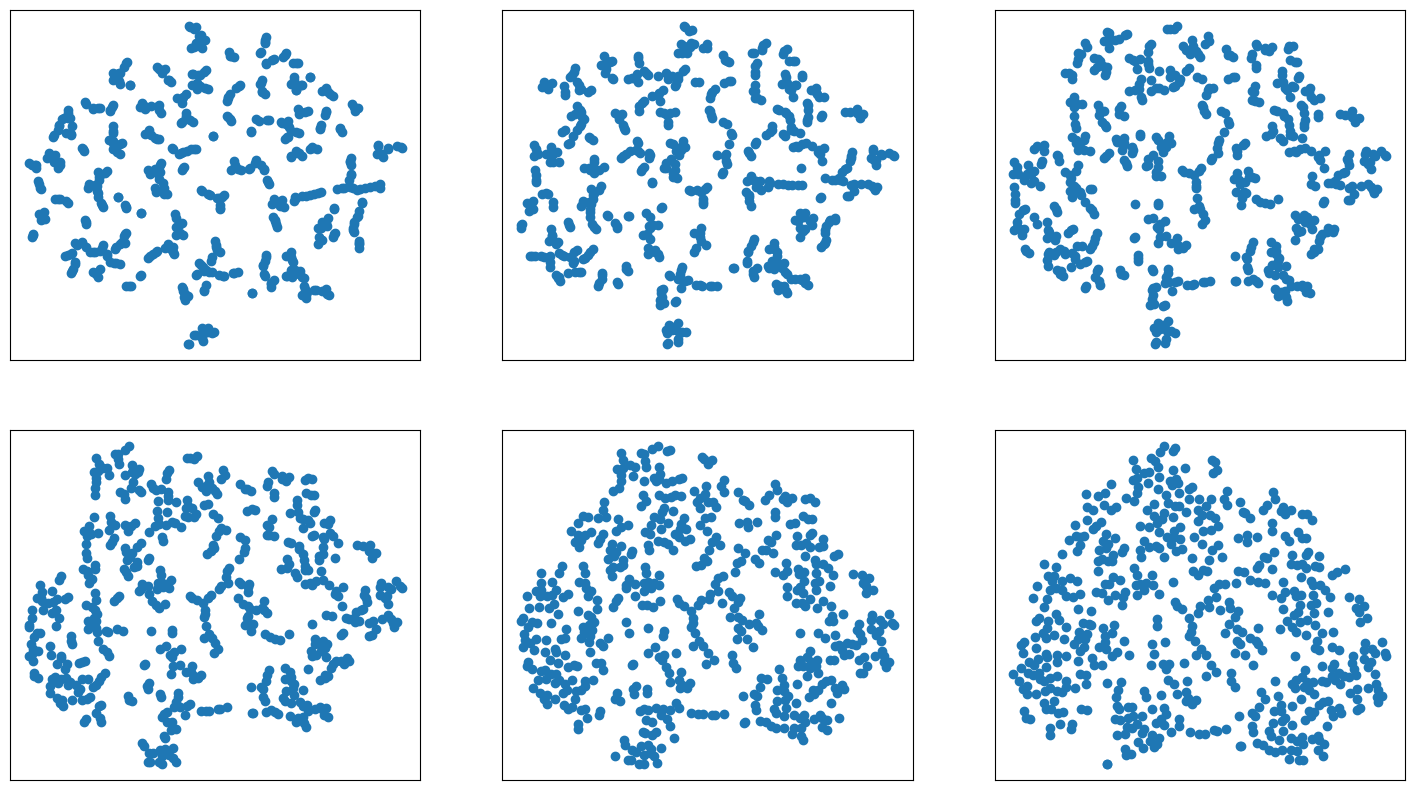

In [8]:
seed = 42
perplexity_values = [3, 5, 7, 10, 20, 30]

fig, axs = plt.subplots(2, 3, figsize=(18,10))
axs = axs.ravel()

for idx, perplexity in enumerate(perplexity_values):
    tsne = TSNE(
        perplexity=perplexity,
        n_components=2, random_state=seed
    )
    data_2d = tsne.fit_transform(cancer_data_scaled)

    scatter = axs[idx].scatter(data_2d[:, 0], data_2d[:, 1])
    axs[idx].set_xticks([])
    axs[idx].set_yticks([])

plt.show()

This provides an intuition on what t-SNE is doing as we change perplexity: low values of perplexity will focus on preserving local structure, and result in a variety of clusters that make sense locally but not at larger scales. High values of perplexity try to capture the global structure more, but may lose resolution in terms of local clustering.

## <span style="color:darkorchid">Dimensionality Reduction and Clustering

As mentioned, dimensionality reduction is often used in conjunction with clustering, however, there are some important things to consider:
* Clustering could be done before or after reducing the data. Usually you want to find a balance in which the dimension is low enough so as points not to appear to separate from each other (high-d phenomena), but high enough so as not to lose too much structure.
* If clustering is used *after* dimensionality reduction, then DO NOT use t-SNE. PCA or UMAP are better suited for this, as their global structures are more reliable.
* t-SNE is a great for visualization. In particular for visualizing data that may be "nonlinearly entangled" in high-dimensions, for which PCA fails.
* UMAP is a nice middle ground. You can try the `umap-learn` library outside of `scikit-learn`, its API is very similar to sklearn's.

Let's finalize this section by clustering our data *in the high dimensional space*, and then performing t-SNE to visualize our clusters.

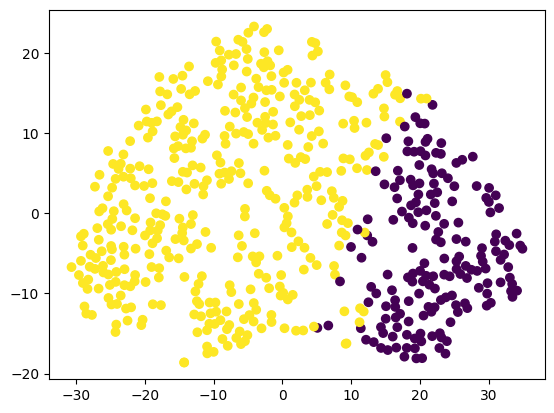

In [9]:
# Cluster using original data
kmeans_cluster = KMeans(n_clusters=2, random_state=42).fit(cancer_data_scaled)

# Show clusters in low-d embedding
plt.scatter(cancer_data_2d[:,0], cancer_data_2d[:,1], c=kmeans_cluster.labels_)
plt.show()

#### <span style="color:red">EXERCISE

Cluster the iris data using k-means and then visualize it using t-sne.

In [ ]:
# I will load it for you
iris = datasets.load_iris()
iris = iris.data

In [ ]:
kmeans_iris =   # <-- fill this out
iris_2d =       # <-- fill this out

In [ ]:
# I will plot it for you
plt.scatter(iris_2d[:,0], iris_2d[:,1], c=kmeans_iris.labels_)
plt.show()